# Illustrasjon av hovedspenninger i plan spenningstilstand

Spenningene $\sigma_x$, $\sigma_y$ og $\tau_{xy}$ på et element i plan spenningstilstand er i koordinatsystemet x'y' som har en vinkel $\theta$ med koordinatsystemet xy gitt av ligningene:

$$\sigma_{x'} = \sigma_x\cos\theta^2+\sigma_y\sin\theta^2+2\tau_{xy}\cos\theta\sin\theta$$
$$\sigma_{y'} = \sigma_x\cos(\theta+\pi/2)^2+\sigma_y\sin(\theta+\pi/2)^2+2\tau_{xy}\cos(\theta+\pi/2)\sin(\theta+\pi/2)$$ 
$$\tau_{x'y'} = (\sigma_y-\sigma_x)\cos\theta\sin\theta+\tau_{xy}(\cos\theta^2-\sin\theta^2)$$



<function __main__.calc_sig_xy>

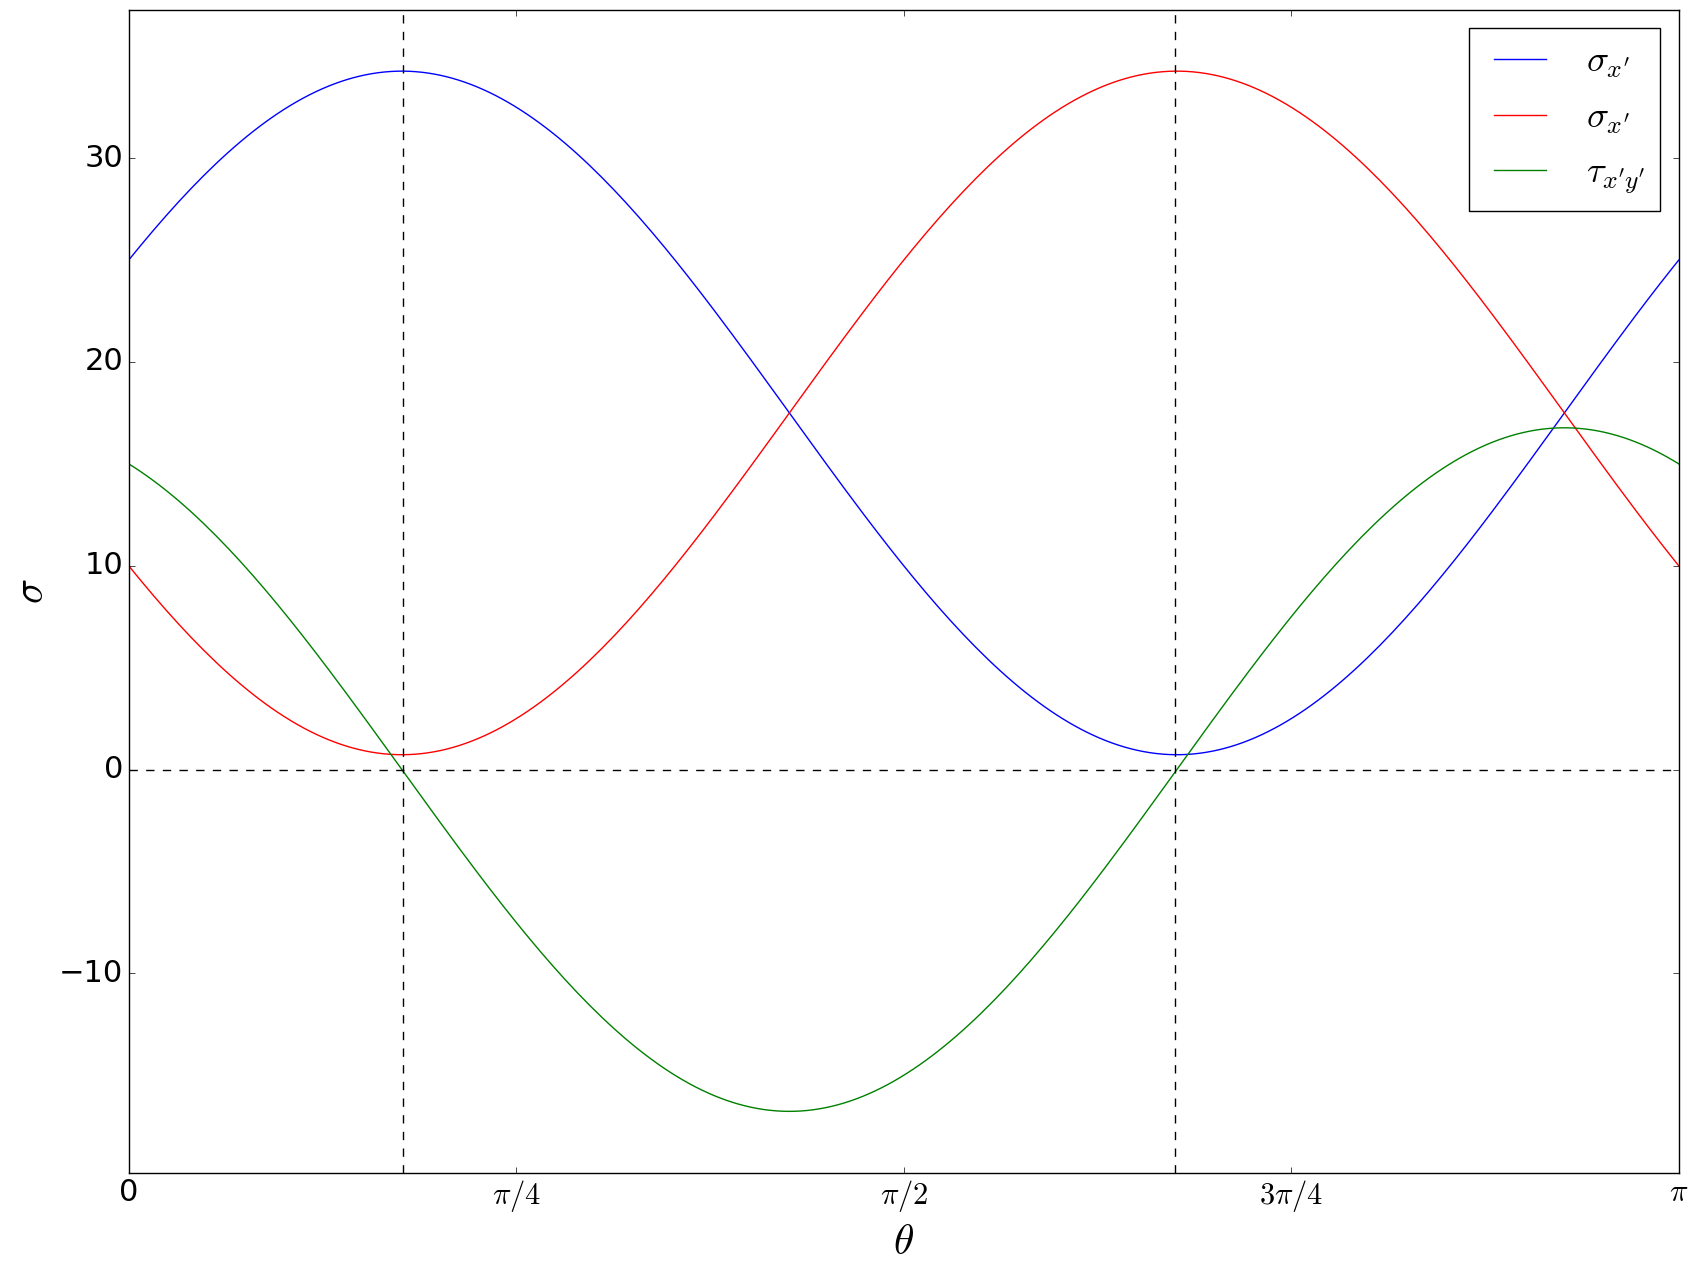

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import *
plt.rcParams.update({'font.size': 22})
sigma_x = 50.
sigma_y = 20.
tau_xy = 10.

def calc_sig_xy(sigma_x,sigma_y,tau_xy):
    # Define vector for angle theta
    theta = np.linspace(0.,np.pi,250)
    
    # Calculate sigma_xt and find maximum point
    sigma_xt = sigma_x*(np.cos(theta))**2+sigma_y*(np.sin(theta))**2+2*tau_xy*np.cos(theta)*np.sin(theta)
    sigma_xt2 = (sigma_x+sigma_y)/2.+(sigma_x-sigma_y)/2.*np.cos(2*theta)+tau_xy*np.sin(2*theta)
    max_val = np.amax(sigma_xt)
    max_index_xt = np.argmax(sigma_xt) 
    
    sigma_yt = sigma_x*(np.cos(theta+np.pi/2))**2+sigma_y*(np.sin(theta+np.pi/2))**2+2*tau_xy*np.cos(theta+np.pi/2)*np.sin(theta+np.pi/2)
    sigma_yt2 = (sigma_x+sigma_y)/2.+(sigma_x-sigma_y)/2.*np.cos(2*(theta+np.pi/2))+tau_xy*np.sin(2*(theta+np.pi/2))
    max_index_yt = np.argmax(sigma_yt) 

    tau_xyt = (sigma_y-sigma_x)*np.cos(theta)*np.sin(theta)+tau_xy*(np.cos(theta)**2-np.sin(theta)**2)
    tau_xyt2 = -(sigma_x-sigma_y)/2.*np.sin(2*theta)+tau_xy*np.cos(2*theta)
    min_val = np.amin(tau_xyt)

    plt.figure(figsize=(20, 15))
    plt.plot(theta, sigma_xt,'b-')
    #plt.plot(theta, sigma_xt2,'r--')
    plt.plot(theta, sigma_yt,'r')
    #plt.plot(theta, sigma_yt2,'g--')
    plt.plot(theta, tau_xyt,'g')
    #plt.plot(theta, tau_xyt2,'k--')
    
    plt.plot([0,np.pi], [0,0], 'k--')
    plt.plot([theta[max_index_xt], theta[max_index_xt]],[min_val-3, max_val+3],'k--')
    plt.plot([theta[max_index_yt], theta[max_index_yt]],[min_val-3, max_val+3],'k--')
    
    plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi ], ['0', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
    plt.xlim(0, np.pi); plt.ylim(min_val-3, max_val+3) 
    
    plt.ylabel(r'$\sigma$', fontsize=30); plt.xlabel(r'$\theta$', fontsize=30)
    plt.legend([r"$\sigma_{x'}$", r"$\sigma_{x'}$", r"$\tau_{x'y'}$"], loc='upper right', frameon='False')

interact(calc_sig_xy,sigma_x=(0,50,1), sigma_y=(0,20,1), tau_xy=(0,30,1))
